# 🧾 NLP Going Deeper 4 : 뉴스 카테코리 다중 분류하기 🧾

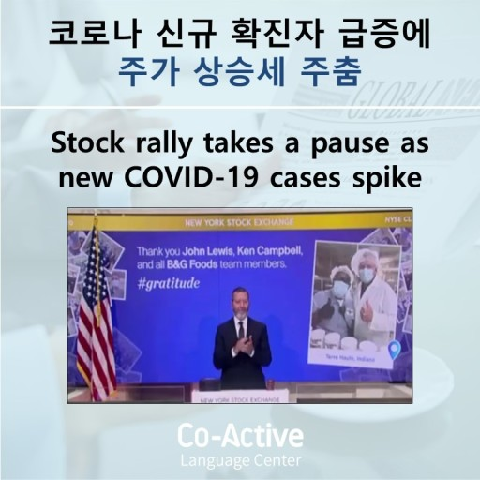

***

## 1. 개관

**텍스트 분류(Text Classification)** 란 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크입니다. 이 태스크는 자연어 처리 태스크 중 가장 기본이 되면서, 비즈니스 영역에서도 가장 수요가 높습니다.

우리가 평소에 쉽게 접할 수 있는 텍스트 분류의 영역으로는 '스팸 메일 자동 분류', '사용자의 리뷰로부터 긍정, 부정을 판단하는 감성 분류', '포털 사이트가 언론사의 뉴스들을 문화, 정치 등으로 자동 분류하여 보여주는 뉴스 카테고리 분류' 등이 있습니다.

이러한 분류들을 AI 알고리즘을 통해 수행할 때는 일반적으로 아래와 같은 과정을 거칩니다!

- 텍스트가 담긴 여러 문서들을 준비합니다.
- Vectorization을 수행합니다.
- Model을 구축하고 학습시킵니다.
- 예측된 결과(Predicted Output)를 도출합니다.

주어진 문장 또는 문서를 벡터화하고, 이를 AI 모델에 입력값으로 넣어주면 모델은 예측한 카테고리를 리턴하게 되죠. 만약 딥러닝 모델을 사용한다면 벡터화 방법으로는 워드 임베딩을 사용하고, RNN, CNN, BERT와 같은 딥러닝 모델을 사용해서 클래스를 예측할 수 있을 거예요.

**하지만 AI 알고리즘에는 딥러닝이 아닌 다른 우수한 수많은 머신러닝 알고리즘들도 존재합니다. 오늘은 딥러닝이 아니라 여러 머신러닝 알고리즘을 사용해서 텍스트를 분류해 보겠습니다.** 딥러닝을 사용하지 않는 상황에서 텍스트를 벡터화하여 좋은 feature를 뽑아내기 위하여, 이전 노드에서 다루었던 내용들이 어떻게 활용되는지 경험해 볼 수 있을 것입니다.

텍스트 분류에는 여러 종류가 있는데, 그 중 대표적인 것으로는 클래스가 2개인 경우인 이진 분류(Binary Classification)와 클래스 3개 이상인 경우인 다중 클래스 분류(Multiclass Classification)가 있습니다. 메일이 스팸인지 아닌지를 결정하는 스팸 메일 분류기가 이진 분류의 대표적인 예입니다. 오늘 우리가 하게 될 텍스트 분류는 **다중 클래스 분류(Multiclass Classification)에 속하는데 구체적인 내용은 데이터를 살펴보면서 이해해 보겠습니다.**

***

## 2. 실습 목표

**이번 노드의 실습 목표는 아래와 같습니다. 😉😉**

- 로이터 뉴스 데이터는 어떻게 이루어지는지 알아봅니다.
- F1-score와 confusion matrix가 무엇인지 이해하고, 이를 출력할 수 있습니다.
- 여러 머신러닝 모델에 대해서 성능을 비교해봅니다.
- 단어 수에 따른 성능을 비교해봅니다.

***

## 3. 작업환경 구성

Cloud Shell에 아래와 같은 명령어를 입력하여 작업환경을 구성해줍니다.

**$ mkdir -p ~/aiffel/reuter_classification**

***

## 4. 로이터 뉴스 데이터 살펴보기

### 로이터 뉴스 데이터와 필요 라이브러리 import

제목에도 나와 있듯, 이번 노드에서 우리가 사용할 데이터는 **로이터 뉴스 데이터(Reuter News Data)** 입니다. **이 데이터는 총 46개의 클래스로 구성되며, 해당 뉴스가 어느 카테고리에 속하는지를 예측하기 위한 데이터**입니다. **텐서플로우 데이터셋에서 제공**하고 있는 데이터로 아주 쉽게 다운로드가 가능합니다. 얼른 라이브러리부터 import하고 데이터를 살펴보아요~💚💚

이렇게 꿀같은 상황이..! (켁켁.. 꿀맛이군요~😂)

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('로이터 뉴스 데이터 및 필요 라이브러리 import 완료')

로이터 뉴스 데이터 및 필요 라이브러리 import 완료


### 훈련 데이터, 테스트 데이터 로드

원활한 진행을 위해 미리 훈련 데이터와 테스트 데이터를 나누고 시작하겠습니다. Tensorflow 데이터셋으로부터 로이터 뉴스 데이터를 로드한 후, 바로 8:2로 데이터를 split 하겠습니다. **혹시 빨간 상자가 나오시더라도 너무 놀라지 마세요! ^^**

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


**num_words는 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절합니다.** 각 단어는 고유한 번호가 정해져 있는 상태이고, 이를 통해서 사용할 단어의 수를 정합니다.

**이 데이터의 단어들은 등장 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있습니다.** 예를 들어서 50번 단어보다는 10번 단어가 데이터 전체에서 빈도수가 등장 빈도 순위로 40등이 더 높은 단어입니다. 위에서 **num_words=10000은 1~10,000번 단어만 사용한다는 의미입니다.** 등장 빈도수가 높은 단어들만 사용하겠다는 의미지요.

주의할 점은 **데이터를 받아올 때, num_words의 인자로 10,000을 기재한다고 해서 10,000보다 높은 정수가 맵핑된 단어들이 받아온 데이터에서 사라지는 게 아니라는 겁니다.** num_words로 주어진 값보다 큰 번호를 가졌던 단어들은 특정 번호로 전부 맵핑이 됩니다. 이는 **OOV 문제라는 자연어 처리의 대표적인 문제와 연관**이 있는데요. 이에 대해서는 뒤에서 언급하겠습니다.

**test_split = 0.2는 전체 데이터 중에서 80%를 훈련 데이터, 20%를 테스트 데이터로 사용한다는 의미입니다.** x_train과 x_test는 훈련용 뉴스 데이터와 테스트용 뉴스 데이터, y_train과 y_test는 훈련용 뉴스 데이터의 레이블와 테스트용 뉴스 데이터의 레이블이 되는 것이지요.

로이터 뉴스 데이터에 포함된 훈련 데이터와 테스트 데이터는 각각 몇 개인지 살펴봅시다.

**format() 메서드를 이용하여 하나의 문장으로 나타내보죠.**

In [3]:
print('훈련 샘플의 수는 {}'.format(len(x_train)), '개 입니다.')
print('테스트 샘플의 수는 {}'.format(len(x_test)), '개 입니다.')

훈련 샘플의 수는 8982 개 입니다.
테스트 샘플의 수는 2246 개 입니다.


### 데이터 출력하기

그럼, 이제 직접 데이터를 출력해 봅시다.

In [4]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
num_classes = max(y_train) + 1
print('클래스의 수는 {}'.format(num_classes), '개 입니다.')

클래스의 수는 46 개 입니다.


위의 결과로 미루어 보아, **x_train과 x_test의 경우 실제 출력해보면 텍스트가 아니라 숫자 시퀀스가 출력**됩니다. 각 단어가 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있다고 했었는데, 이미 뉴스 데이터를 다운로드할 때는 단어가 아니라 해당 번호로 변환이 되어서 출력됩니다.

대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, **텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해 주는 셈**입니다.

**y_train과 y_test는 그 뉴스의 레이블 값을 나타냅니다.** 둘 다 숫자 3이 출력되었습니다. 각 뉴스는 정수로 된 레이블을 가지고 있어요. 이 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하면 현재 클래스의 개수를 볼 수 있어요.

그 이유는 우리는 보통 1부터 끝까지 세는데, 0이 포함되므로 1을 더해주어야 한답니다~😊😊

또한 이 뉴스 데이터는 **총 46개의 클래스**를 가지고 있는 것을 파악하실 수 있습니다. 생각보다는 적지 않은 수의 클래스라서 높은 정확도를 얻는 일이 쉽지는 않을 것 같은 느낌이 듭니다. 미리 광광 울까요~😭😭

### 데이터 분포 확인하기

**로이터 뉴스의 길이 분포를 확인해 봅니다.**

자연어 처리 과정에서 문장과 문서들의 길이는 보통 다릅니다. 우리가 평소에 보는 뉴스 기사의 길이가 항상 똑같지는 않을 것입니다. 길이 분포를 확인하는 이유는 길이의 최소, 최대, 평균 등을 살펴보기 위함 입니다.

**🔥🔥Q. 2376으로 추정되는 막대 높이보다 더 높은 높이를 가진 구간이 있는데, 왜 최대 길이가 2376인지?🔥🔥**

훈련용 뉴스의 최소 길이 : 13
훈련용 뉴스의 최대 길이 : 2376
훈련용 뉴스의 평균 길이 : 145.5398574927633


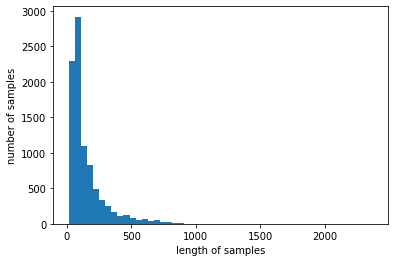

In [7]:
print('훈련용 뉴스의 최소 길이 : {}'.format(min(len(l) for l in x_train)))
print('훈련용 뉴스의 최대 길이 : {}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 : {}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

(위의 Q. 내용을 이해했다면) 길이가 가장 긴 뉴스의 길이는 2,376입니다. 평균 길이는 145구요. 아무래도 **길이가 가장 긴 뉴스의 길이가 다른 뉴스에 비해 유독 긴 편인 것 같습니다.** 시각화된 그래프의 분포로 봤을 때 500~1,000 사이의 길이를 가지는 뉴스도 일부 있어 보이죠?

우리가 맞춰야 하는 클래스의 분포를 확인해볼까요? 모델의 성능에 영향을 줄 수 있는 요소이기 때문에 실제로 모든 클래스가 다 존재는 하는 것인지, 또 어떤 클래스가 유독 많은지와 같은 것들을 사전에 확인해 보아야 합니다.

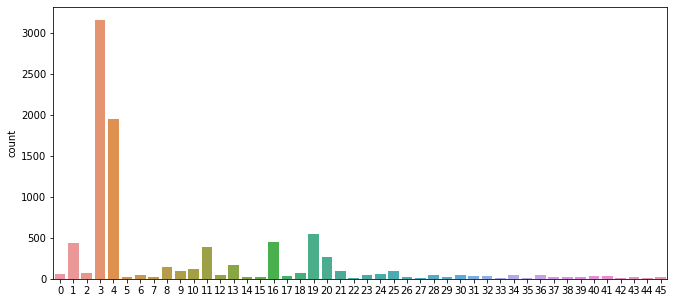

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

이 뉴스 데이터는 3번, 4번 클래스가 대부분을 차지하고 있습니다. 그 뒤로는 19번, 16번, 1번, 11번 등이 높은 분포를 가지고 있네요. 시각화를 통해 어떤 클래스가 많고, 적은 것을 쉽게 확인할 수는 있었지만 수치적으로 정확히 몇 개인지도 살펴 보겠습니다.

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재합니다. 그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 네 번째로 많네요. 이렇게 각 클래스가 몇 개가 존재하는지도 확인해 보았습니다.

## 5. 로이터 뉴스 데이터 복원하기

### 정수 시퀀스 데이터에서 원본 데이터로 복원하기

이 데이터는 이미 어느 정도 전처리가 되어서 각 단어가 정수 시퀀스로 변환된 채 제공되고 있었습니다. 하지만 일반적인 상황이라면 처음부터 텍스트를 숫자로 수치화하는 과정을 해야 합니다.

그래서 우리는 여기서 **정수 시퀀스로 변환된 데이터를 '굳이' 다시 텍스트로 돌려보겠습니다.**

아래와 같이 **로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공**합니다. 이를 word_index로 저장해보겠습니다.

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('word_index에 저장 완료')

word_index에 저장 완료


이게 이 데이터의 단어장(Vocabulary) 입니다. 이제 word_index 안에 단어를 입력하면 이 단어가 어떤 정수와 맵핑이 되는지를 알 수 있습니다. 단어 'the'는 어떤 정수와 맵핑이 될까요?

In [11]:
word_index['the']

1

In [12]:
word_index['it']

13

In [13]:
word_index['you']

1025

그런데 지금 우리가 해야 할 일은 현재 갖고 있는 **정수 시퀀스로 되어 있는 데이터를 텍스트 형태로 되돌려야 하는 일이므로 사실 word_index보다는 정수로부터 단어를 얻을 수 있는 index_word가 필요합니다.**

그런데 이 데이터에는 숨겨진 비밀이 하나 있는데, 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어입니다. 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어입니다. **다른 단어들도 마찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3을 한 숫자가 원래 고유한 숫자입니다. 이건 로이터 뉴스 데이터가 정의한 일종의 약속입니다.**

reuters.get_word_index에는 실제 단어에 맵핑 한 정수에 -3을 한 정수를 입력해 놓았거든요. 그렇기 때문에 **word_index에서 index_word를 만들 때, 각 정수에 +3을 해주어야 합니다.**

In [14]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('index_to_word 거의 구성 완료')

index_to_word 거의 구성 완료


숫자 4와 16, 1028을 넣어서 the와 it, you가 각각 잘 출력되는지 확인해보겠습니다!

In [15]:
print(index_to_word[4])
print(index_to_word[16])
print(index_to_word[1028])

the
it
you


이 데이터를 위해 약속된 비밀은 더 있습니다. **0번, 1번, 2번은 사실 각각 pad, sos, unk라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다.** 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성됩니다.

In [16]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
print('index_to_word 전부 구성 완료')

index_to_word 전부 구성 완료


자, 이제 index_to_word를 통해서 첫 번째 훈련용 뉴스 기사를 원래 텍스트로 복원해보겠습니다!

In [17]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


첫 번째 훈련용 뉴스 기사가 정수 시퀀스에서 텍스트로 복원되었습니다. 이 데이터도 어느 정도 전처리가 된 상태라서, 자연스럽게 읽히지는 않습니다. 하지만 문맥을 가진 텍스트이기 때문에, 이 데이터를 가지고 머신러닝을 시작해도 별 무리는 없어 보입니다.

복원된 첫 번째 훈련용 뉴스 기사에 특별 토큰인 sos와 unk가 보이는데, sos는 텍스트 분류를 위한 토큰이 아니므로 크게 신경을 쓰지 않겠지만, **unk는 자연어 처리 전반에서 쓰이는 특별 토큰이므로 이에 대해서는 이해할 필요가 있습니다.**

### OOV 문제와 UNK 토큰

**기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)이라고 합니다. 기계가 미처 배우지 못한 모르는 단어를 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) 이라고 표현합니다.** 어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 unk라는 일관된 특별 토큰으로 변환합니다.

우리가 앞 스텝인 '훈련 데이터, 테스트 데이터 로드'에서 알아본 코드를 상기해 보면, **num_words=10000은 정수 번호가 10,000이 넘는 단어들을 자동으로 unk 토큰**으로 처리합니다. **로이터 뉴스 데이터에서 unk은 정수 2번을 가지도록 약속**돼 있었으므로, 데이터를 로드하는 과정에서 정수 번호가 10,000이 넘는 단어들은 전부 정수 2로 변환되어서 로드가 되었던 것입니다.

**🔥 예시 1. 로이터 뉴스 데이터 중 [4, 587, 23, 133, 6, 30, 515]인 정수 시퀀스가 있습니다. 현재 우리가 가진 index_word를 사용하여 이 정수 시퀀스를 텍스트 시퀀스로 변환해보세요. 🔥**

In [18]:
print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))

the transaction is expected to be completed


**🔥 예시 2. 데이터를 로드하기 전 로이터 뉴스 데이터에는 다음과 같은 정수 시퀀스가 있었다고 해봅시다. (단어장의 크기가 10000이라고 가정합니다)**

[4, 10000, 57, 133, 16, 10001, 685]

이 데이터를 로드한 데이터에서 우리가 저 문장을 출력하면 다른 정수 시퀀스가 출력되는데요. 해당 정수 시퀀스를 추측해 보세요. 🔥

**정답 : [4, 10000, 57, 133, 16, 2, 685]**

이제 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환해 보겠습니다.

In [19]:
## 전체 훈련용 뉴스 데이터
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [20]:
## 전체 테스트용 뉴스 데이터
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


훈련, 테스트 데이터별로 각각 출력해 보고, 제대로 변환이 되었는지 확인해 보겠습니다.

In [21]:
x_train[:3]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [22]:
x_test[:1]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3']

## 6. 벡터화

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('필요한 라이브러리들입니다. import하였습니다.')

필요한 라이브러리들입니다. import하였습니다.


개관에서 언급했던 내용을 다시 한 번 상기해 보면 **텍스트 데이터가 있을 때, 모델의 입력으로 넣기 위해서는 우선 각 문서를 벡터화할 필요가 있습니다.** 항상 그런 것은 아니지만, 일반적으로 텍스트 분류를 할 모델로 인공 신경망을 사용하는 경우, 벡터화 방법 또한 인공 신경망을 사용하는 것이 보편적입니다. Word Embedding, Document Embedding, Contextual Embedding 등의 다양한 벡터화 방법이 존재하는데요.

이번 실습에서는 딥러닝이 아닌 **머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정**이기 때문에 벡터화 방법도 인공 신경망이 아닌 방법을 사용하겠습니다. 저희가 사용할 벡터화 방법은 **Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬**입니다.

이에 대한 내용은 위키독스에 자세히 소개되어 있습니다. (**https://wikidocs.net/24559**)

**🔥 예시 1. 총 3개의 문서가 있습니다. 단어 단위로 토크나이징을 하였을 때, 첫 번째 문서의 길이가 5, 두 번째 문서의 길이가 4, 세 번째 문서의 길이가 6이었습니다. 이를 기반으로 만들어진 DTM의 열의 개수는 15인가요? 🔥**

8- 틀렸습니다. DTM의 열의 개수는 중복을 제외한 단어들의 집합인 단어장(Vocabulary)의 크기를 가지기 때문에 제시된 문서 중에 하나라도 겹치는 단어가 존재한다면 DTM의 열의 개수는 15가 되지 못합니다.

**🔥 예시 2. DTM을 기반으로 문서를 군집, 혹은 분류한다면 같은 단어가 많이 등장한 문서들일수록 그 유사도가 높다고 판단할 수 있습니다. 군집이나 분류 시에 이러한 가정을 사용한다면 성능을 저하시킬 수 있는 요소는 무엇일까요? 🔥**

- 불용어는 모든 문서에 자주 등장하지만 실제로 중요한 의미를 가지지 못하므로, 이러한 가정에서는 성능 저하의 원인이 될 수도 있습니다.

**Document Term Matrix, DTM은 사이킷런의 CountVectorizer()를 통해서 생성할 수 있습니다.**

DTM을 생성하고, DTM의 크기를 확인해보겠습니다.

In [24]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


훈련용 뉴스의 수가 총 8,982개였기 때문에 **DTM의 행의 개수는 8,982개**가 됩니다.

그런데 이상한 점은 앞에서 데이터를 로드할 때, num_words=10,000이라는 값을 사용했음에도 DTM 열의 개수는 이보다 현저하게 적은 9,670개밖에 되지 않습니다. 그 이유는 DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문입니다.

이제, DTM 행렬을 이어서 **TF-IDF** 행렬을 만들어보겠습니다. **TF-IDF 행렬은 퀴즈 4에서 알아본 DTM의 단점을 보정해 주는 효과**를 가지고 있습니다. TF-IDF 행렬에 대한 설명은 여기서 확인합니다. 역시 위키독스네요.😉 (**https://wikidocs.net/31698**)

**🔥 예시 1. 다음 명제는 참입니까? (TF-IDF 행렬은 모든 문서에 걸쳐서 중요하다고 판단되는 단어에 가중치를 주는 효과를 가지고 있다. 만약, 모든 문서에 걸쳐서 자주 등장하는 단어라면 TF-IDF는 다른 단어들보다 상대적으로 높은 가중치를 준다.) 🔥**

- 틀렸습니다. TF-IDF 행렬은 DTM의 단점을 보정하는 기능을 하기 때문에, 자주 등장하는 단어라면 TF-IDF 시스템에서는 중요도가 낮은 단어로 판단내리게 됩니다.

**TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성**할 수 있습니다. **TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가집니다.**

In [25]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


## 7. 나이브 베이즈 분류기

In [26]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score # 정확도 계산

print('필요한 라이브러리들입니다. import하였습니다.')

필요한 라이브러리들입니다. import하였습니다.


**나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 활용하게 됩니다.**

사이킷런이 제공하는 머신러닝 모델들은 공통적으로 **fit()** 이라는 함수를 제공하고 있는데, 훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하면 모델이 이를 학습합니다.

In [27]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

**테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련 데이터와 동일한 전처리를 거쳐야 합니다.** 다시 말해 **테스트 데이터도 TF-IDF 행렬로 변환해 주어야 합니다.** 그 후 해당 행렬과 predict() 함수를 통해 예측값을 얻어 정확도를 측정합니다.

In [28]:
x_test_dtm = dtmvector.transform(x_test) # 테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) # DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.5997328584149599


약 **66%** 의 정확도를 얻었습니다. 뒤에서 다른 모델들을 통해서 더 좋은 성능을 얻을 수 있는 방법을 찾을 수 있을지도 모르겠습니다 😍

나이브 베이즈 분류기가 임의의 샘플에 대해서 클래스를 정확히 예측하는지 테스트를 해보겠습니다. **네 번째 샘플(인덱스 상으로는 3)의 원문과 레이블을 출력**하면 다음과 같습니다.

In [29]:
print(x_test[3])

<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3


In [30]:
print(y_test[3])

4


과연 모델은 제대로 예측하고 있는지, 그리고 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 그래프로 시각화해 봅시다.

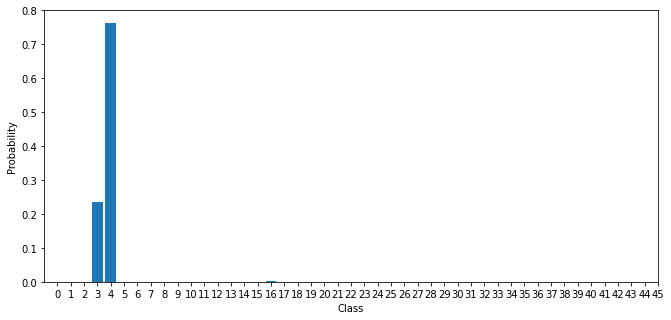

In [31]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [32]:
## 네 번째 샘플에 대한 모델의 예측결과
model.predict(tfidfv_test[3])

array([4])

모델은 4번 클래스를 약 90%의 확률로 확신하는데, 10%의 확률로 3번 클래스라고 판단합니다. **90%의 확률로 확신하므로 모델이 예측한 레이블은 4번입니다.** 해당 샘플은 정확하게 예측한 것 같습니다.

**🔥 예시. 열 번째 샘플에 대해서 모델의 예측결과를 살펴보세요. 🔥**

In [33]:
print(x_test[9])

<sos> bankers trust new york corp said it has placed its approximately 540 mln dlrs of medium and long term loans to brazil on non accrual status and that first quarter net income will be reduced by about seven mln dlrs as a result brazil suspended interest payments on its 68 billion dlrs of medium and long term debt on february 22 u s banking regulations do not require banks to stop accruing interest on loans until payments are 90 days overdue but bankers trust said it acted now because of the high potential of a continued suspension that would result in reaching the 90 day limit in the second quarter of 1987 assuming no cash payments at current interest rates are received for the rest of 1987 bankers trust estimated that full year net income would be reduced by about 30 mln dlrs bankers trust said it assumes that debt negotiations between brazil and its commercial bank lenders will lead to the resumption of interest payments the negotiations resume in new york on friday when central 

In [34]:
print(y_test[9])

3


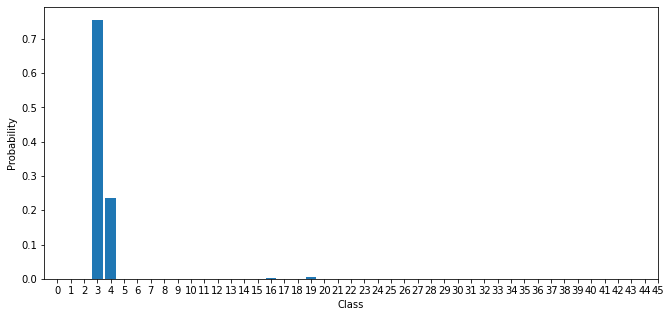

In [35]:
probability_9 = model.predict_proba(tfidfv_test[9])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_9)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [36]:
## 열 번째 샘플에 대한 모델의 예측결과
model.predict(tfidfv_test[9])

array([3])

열 번째 샘플의 경우 아까 전 네번째 샘플에 비해서는 이 모델의 레이블이 3일 것이라고 예측을 확신할 확률이 많이 낮아진 것 같습니다. 그래도 다행스럽게도 predict를 수행한 결과는 3으로 잘 나왔네요.

## 8. F1-Score, Confusion Matrix

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('필요한 라이브러리들입니다. import 하였습니다.')

필요한 라이브러리들입니다. import 하였습니다.


### Precision, Recall & F1 Score

**참고 : https://sumniya.tistory.com/26**

**정리 : Accuracy는 가장 직관적으로 모델의 성능을 나타낼 수 있는 평가 지표입니다. 하지만 Label이 imbalance한 경우를 제대로 고려하지 못하기 때문에, 이러한 경우에는 이를 고려한 f1-score를 사용하기도 합니다.**

**사이킷런의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공**합니다. 이 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가합니다.

In [38]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

**출력결과의 아래쪽 3개의 지표에 대한 설명은 아래와 같습니다.**

- **macro** : 단순 평균
- **weighted** : 가중 평균으로, 각 클래스에 속하는 표본의 개수를 나타냄
- **accuracy** : 정확도로, 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율을 나타냄

### 혼동 행렬 (Confusion Matrix)

제출기한으로 인해 부득이하게 영상과 자료 링크로 대체합니다. 😭😭

- **영상 : https://www.youtube.com/watch?v=M0GBAzFV9_A**
- **링크 : https://mjdeeplearning.tistory.com/31**

아래는 혼동 행렬을 시각화하기 위해 함수로 구현한 후, 결과를 반환하는 과정입니다.

In [39]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

print('혼동행렬을 시각화하는 함수 정의 완료')

혼동행렬을 시각화하는 함수 정의 완료


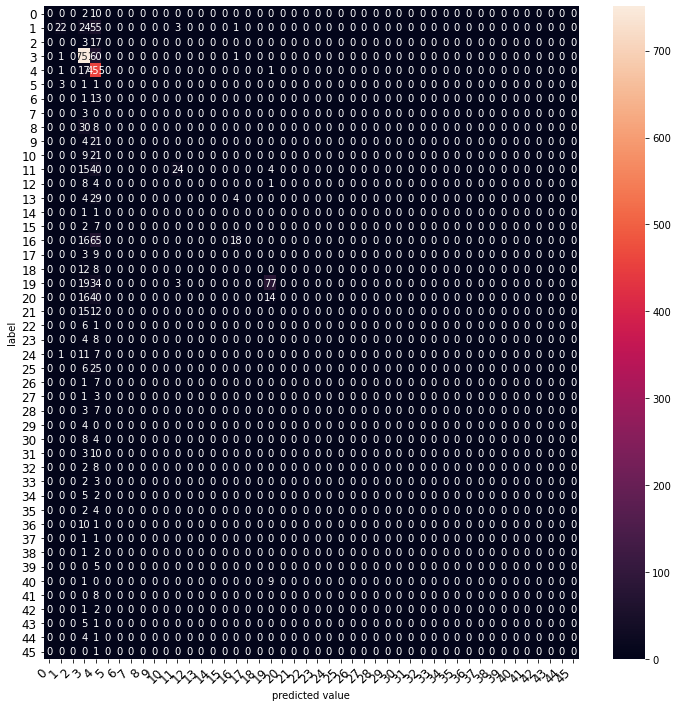

In [40]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 9. 다양한 머신러닝 모델 사용해 보기

앞서 사용한 나이브 베이즈 분류기(MultinomialNB)로는 약 66%의 정확도밖에 얻지 못했습니다. 사실 **클래스의 개수가 46개인 것을 감안해도 그리 좋은 성능은 아닙니다.** 좀 더 좋은 성능을 얻기 위해서 여러 다른 모델들을 시도해 봅시다.

### Complement Naive Bayes Classifier (CNB)

나이브 베이지안 분류기는 독립 변수가 '조건부로 독립적'이라는 가정을 하기 때문에, 문서가 특정 분류에 속할 실제 확률을 사용할 때 문제가 발생할 수 있습니다. 예를 들어 많은 샘플(sample)이 특정 클래스에 치우쳐져 있을 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호할 수 있어요. **앞서 로이터 뉴스 데이터에서도 3번, 4번 클래스가 다른 클래스에 비해 상대적으로 많은 클래스를 갖고 있음을 확인했었죠.**

**데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기**입니다. **컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징**을 가지고 있습니다. 따라서 컴플리먼트 나이브 베이즈 분류기는 나이브 베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋습니다.

In [41]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [42]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


아까 전 MultinomialNB 분류기보다 훨씬 성능이 좋아진 것이 보이시나요? 😄😄

### 로지스틱 회귀 (Logistic Regression)

다음으로는 가장 널리 알려진 두 개의 선형 분류 알고리즘인 **로지스틱 회귀와 서포트 벡터 머신을 통해서 로이터 뉴스를 분류해 봅시다.**

**로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원**합니다. 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 합니다. 주의할 점은 **이름은 회귀지만, 실제로는 분류를 수행**한다는 점입니다.

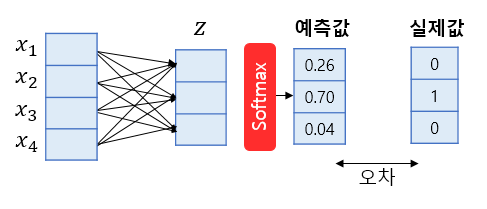

**소프트맥스 함수는 클래스가 N개일 때, N차원의 벡터가 '각 클래스가 정답일 확률'을 표현하도록 정규화해주는 함수**입니다. 예를 들어 위의 그림은 4차원의 벡터를 입력으로 받으면서 3개의 클래스를 가지는 경우의 소프트맥스 회귀의 동작 과정을 보여주고 있습니다. 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률입니다. 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습됩니다.

사이킷런에서 소프트맥스 회귀는 **LogisticRegression()**을 통해서 구현할 수 있습니다.

In [44]:
lr = LogisticRegression(C=5000, penalty='l2')
lr.fit(tfidfv, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=5000)

In [45]:
predicted = lr.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.815227070347284


아까 전 CNB 모델보다 정확도가 더 높아졌군요! 😊😊😊

### 선형 서포트 벡터 머신 (Linear Support Vector Machine)

**영상 링크 : https://www.youtube.com/watch?v=y4CYcpRiNsw**

서포트 벡터 머신에서 **서포트 벡터란 Decision Boundary와 가장 가까운 각 클래스의 데이터**를 가리킨다.

하지만, Decision Boundary에 해당되는 벡터를 가리키지는 않는다.

많은 선형 분류 모델은 태생적으로는 이진 분류만을 지원하는 이진 분류 모델입니다. (위에서 설명한 로지스틱 회귀는 예외입니다.)

서포트 벡터 머신의 구현체인 사이킷런의 LinearSVC 또한 태생적으로는 이진 분류를 위한 모델입니다. 그런데 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있습니다. 바로 일대다(one-vs.-rest 또는 one-vs.-all) 방법입니다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다.

결국 클래스의 수만큼 이진 분류 모델이 만들어집니다. 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택합니다.

**서포트 벡터 머신을 사용하여 로이터 뉴스를 분류하는 코드를 구현해 보겠습니다.**

In [46]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [47]:
predicted = lsvc.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.7858414959928762


### 결정 트리 (Decision Tree)

**영상 링크 : https://www.youtube.com/watch?v=n0p0120Gxqk**

**결정 트리는 분류와 회귀 문제에 널리 사용하는 모델**입니다. 기본적으로 결정 트리는 결정에 다다르기 위해 '예/아니오' 질문을 이어 나가면서 학습합니다.

마치 이러한 형태의 질문은 스무고개 놀이의 질문처럼 생기지 않았을까요? 😍

사이킷런에서는 **DecisionTreeClassifier()**를 사용해서 결정 트리를 구현할 수 있습니다.

결정 트리의 깊이는 **max_depth**라는 인자를 통해서 정해줄 수 있습니다.

In [48]:
tree = DecisionTreeClassifier(max_depth=10, random_state=50)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=50)

In [49]:
predicted = tree.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.622439893143366


이전까지 돌려봤던 머신러닝 모델들을 통틀어 가장 낮은 정확도를 보였습니다.

사실 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징이 있습니다. **DTM이나 TF-IDF 행렬의 경우 고차원이면서 대부분의 값이 0인 희소한 데이터**이므로 **트리 계열의 모델보다는 선형 분류 모델을 통해 접근**하는 것이 더 나은 접근일 수 있습니다.

### 랜덤 포레스트 (Random Forest)

**영상 링크 : https://www.youtube.com/watch?v=nZB37IBCiSA**

**앙상블(Ensemble)이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다.** 뒤에서 보팅(Voting)이라는 앙상블 기법을 알아볼 텐데, 모델 자체가 앙상블을 사용하는 앙상블 모델들도 존재합니다. **랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델입니다.**

그렇다면, 역시나 정확도가 낮게 나올 것 같은 예감이 드는군요. 😥

한편, 앞에서 살펴본 결정 트리의 단점을 랜덤 포레스트가 해결해 줄 수 있다고 하는데..

영상에서 언급된 단점은 무엇이었으며, 랜덤 포레스트가 어떻게 그 문제를 해결할 수 있을까요?

- **결정 트리는 훈련 데이터에 과적합(Overfitting)되는 경향이 있는데, 랜덤 포레스트는 이 문제를 앙상블로 해결**합니다. 가령 서로 다른 방향으로 과적합된 트리들을 조합하면 오히려 모델 전체에서는 과적합을 피할 수 있다는 것이죠.

랜덤 포레스트로 모델을 훈련시키고, 테스트 데이터에 대해서 정확도를 평가해 보도록 합니다.

In [50]:
forest = RandomForestClassifier(n_estimators=5, random_state=50)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=50)

In [51]:
predicted = forest.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.672306322350846


**결론 : 결정 트리보단 '그나마' 낫다.**

### 그래디언트 부스팅 트리 (GradientBoostingClassifier)

그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델입니다. 그레디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.

그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있습니다. 그래서 보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋습니다.

일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠릅니다.

정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델입니다. 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점이 있습니다.

현재 우리가 사용하는 TF-IDF 행렬은 희소하고 고차원 데이터지만, 결정 트리나 랜덤 포레스트보다 더 높은 성능을 얻을 수 있을지 한번 테스트해 볼까요?

지금까지 사용한 머신러닝 모델들 중에서 학습 시간이 가장 길 것입니다! 🔥🔥

**참고 : verbose=3을 GradientBoostingClassifier안에 인자로 넣어 진행 상황을 확인할 수 있습니다**

In [52]:
grbt = GradientBoostingClassifier(random_state=50, verbose=3)
print('시간 쪼끔 걸릴겁니다. 편히 쉬다 오세요~🛸')
grbt.fit(tfidfv, y_train)

시간 쪼끔 걸릴겁니다. 편히 쉬다 오세요~🛸
      Iter       Train Loss   Remaining Time 
         1       12945.3758           17.92m
         2   689466317.0970           17.96m
         3   714513866.8588           17.95m
         4 5877165428984744247296.0000           17.93m
         5 10426711820123106986977042547540664048288935679021933165945006373019869625924528355223045452252145738333715498957091672098996047839232.0000           17.79m
         6 10426711820123106986977042547540664048288935679021933165945006373019869625924528355223045452252145738333715498957091672098996047839232.0000           17.65m
         7 10426711820123106986977042547540664048288935679021933165945006373019869625924528355223045452252145738333715498957091672098996047839232.0000           17.54m
         8 10426711820123106986977042547540664048288935679021933165945006373019869625924528355223045452252145738333715498957091672098996047839232.0000           17.35m
         9 1042671182012310698697704254754066404828893567902193316

GradientBoostingClassifier(random_state=50, verbose=3)

In [53]:
predicted = grbt.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.767586821015138


앞에서 돌려본 결정 트리, 랜덤 포레스트에 비해 뚜렷하게 높은 정확도를 나타내었습니다.

### 보팅 (Voting)

**영상 링크 : https://www.youtube.com/watch?v=y4Wh0E1d4oE**

보팅은 크게 **하드 보팅**과 **소프트 보팅**으로 나누어지는데, 각 보팅의 결정 방식은 다음과 같습니다.

- **하드 보팅** : 결과물에 대한 최종값을 투표 후 결정
- **소프트 보팅** : 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종값을 도출

이전에 사용했던 세 가지 모델인 로지스틱 회귀, CNB, 그래디언트 부스팅 트리를 사용하여 **소프트 보팅**을 하였을 때의 성능을 비교해 봅시다.

In [55]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=5000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=50, verbose=3))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=5000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=50,
                                                         verbose=3))],
                 n_jobs=-1, voting='soft')

In [56]:
predicted = voting_classifier.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) # 예측값과 실제값 비교

정확도: 0.8183437221727515


**지금까지의 모델들을 모두 제치고 가장 정확도가 높은 결과를 얻었군요!! 💎💎**

## 10. Vocabulary size를 변경해서 시도 해보기 (Project Step)

지금까지는 모델을 변경하고, 모델을 조합해서 성능을 올리는 일에 힘썼습니다. 그런데 어쩌면 **성능을 높이는 방법은 단순히 모델을 조정하는 일에 한정되지 않을 수 있습니다.** 데이터의 전처리는 모델의 성능에 영향을 직접적으로 줍니다. 특히나 Bag of Words를 기반으로 하는 DTM이나 TF-IDF의 경우, 사용하는 단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 줄 수 있겠죠.

중요도가 낮은 단어들까지 포함해 너무 많은 단어를 사용하는 경우에도 성능이 저하될 수 있고, 반대로 너무 적은 단어들을 사용해도 성능이 저하될 수 있습니다. 이렇게 **변화된 단어의 수는 또 어떤 모델을 사용하느냐에 따라 유리할 수도, 불리할 수도 있습니다.**

**🔥🔥🔥 이번 스텝은 프로젝트 스텝입니다. 단어의 수에 따라서 모델의 성능이 어떻게 변하는지 실험해 보세요. 🔥🔥🔥**

**참고로 실습 모델의 Vocabulary Size는 10000이었으며, 각 머신러닝 모델에 대한 결과는 아래와 같습니다. 소수점 이하 넷째자리에서 반올림하여 소수점 이하 셋째자리까지 표현하겠습니다.**

- 나이브 베이즈 분류기 : 0.657
- CNB : 0.771
- 로지스틱 회귀 : 0.808
- 서포트 벡터 머신 : 0.778
- 결정 트리 : 0.620
- 랜덤 포레스트 : 0.674
- 그래디언트 부스팅 트리 : 0.767
- 보팅 : 0.812

### Case 1. 빈도수 상위 5000개 단어만 사용할 경우

- 나이브 베이즈 분류기 : 0.673
- CNB : 0.771
- 로지스틱 회귀 : 0.807
- 서포트 벡터 머신 : 0.766
- 결정 트리 : 0.618
- 랜덤 포레스트 : 0.694
- 그래디언트 부스팅 트리 : 0.771
- 보팅 : 0.813

### Case 2. 모든 단어를 사용할 경우

- 나이브 베이즈 분류기 : 0.600
- CNB : 0.765
- 로지스틱 회귀 : 0.815
- 서포트 벡터 머신 : 0.786
- 결정 트리 : 0.622
- 랜덤 포레스트 : 0.672
- 그래디언트 부스팅 트리 : 0.768
- 보팅 : 0.818

**실험한 결과로 다음을 알 수 있습니다.**

- 모든 단어를 사용했을 때, 동일 조건에서 조금이라도 더 좋은 성능을 보인 모델은 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 보팅이었습니다.
- 단어장의 크기를 5000, 10000, Full로 하였을 때 로지스틱 회귀, 결정 트리 모델에서 단어장의 크기가 클수록 정확도가 높게 출력되었습니다.

## 11. 딥러닝 모델과 비교해 보기 (Project Step)

In [68]:
from tensorflow import keras
from keras.layers import Bidirectional, LSTM, GRU, Dense, Conv1D
from keras.layers import Embedding, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [69]:
vocab_size = 10000  # 단어 사전의 크기를 지정
word_vector_dim = 4   # 한 단어를 표현하는 임베딩 벡터의 차원의 개수

In [70]:
# 1-D CNN 모델 구성

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 3, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 4)           40000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          416       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          1552      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

이후에는 원인을 알 수 없는 오류로 인하여 더 이상 작업하지 못했습니다.. 😭😭

## 12. 프로젝트 회고

- Exploration 노드에서는 학습시켜 보지 않았던 몇몇 모델들도 이번 노드에서 함께 돌려볼 수 있어서 흥미로웠습니다.
- 어떤 머신러닝 모델을 선택하여 학습시키느냐, Vocabulary Size를 얼마나 하느냐 등에 따라 도출되는 Accuracy는 달라질 수 있습니다.
- 딥러닝 모델 구성까지는 성공적으로 되었지만, 모델을 학습시키는 코드를 작성하다가 원인을 알 수 없는 오류가 발생하여 해당 시점에서 더 이상 해결을 보지 못해 아쉬웠습니다.